In [1]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import CIFAR100
import torchvision.transforms as transforms
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split,ConcatDataset

import model
import data

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
net = model.resnet34().to(device)


In [4]:
trainDataLoader, testDataLoader =  data.loadData(250)

Files already downloaded and verified


In [5]:
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.0001)  

In [6]:
def evaluate(model,dataloader):
  acc = 0.0
  rights = 0
  wrongs = 0
  for i, test_examples in enumerate(dataloader, 0):
    #predicting using the nets
    inputs, labels = test_examples
    predicted_outputs = model(inputs.float().cuda())
    #Selecting the label which has the largest outputs
    outputs = torch.argmax(predicted_outputs, 1)

    #Counting successfully and unsuccessfully predicted cases
    for j, n in enumerate(outputs):
      if n == labels[j]:
        rights += 1
      else:
        wrongs += 1
  #calculate accuracy with the cases we recorded
  acc = rights/(rights+wrongs)
  #return the accuracy
  return acc


In [7]:
def train(model,train,test,loss_fn,optimizer,watch_iter):
    total_iter = 0
    loss = 0.0

    while total_iter < 10000:
        for batch in train:
            total_iter += 1
            train_inputs, train_labels = batch
            train_inputs, train_labels = train_inputs.to(device), train_labels.to(device)
            train_outputs = model(train_inputs)
            l = loss_fn(train_outputs, train_labels)
            loss += l.item()
            optimizer.zero_grad()
            l.backward()
            optimizer.step()

            if total_iter % watch_iter == 0:
                train_loss = loss / watch_iter
                train_loss_his.append(train_loss)
                loss = 0.0
                for batch in test:
                    test_inputs, test_labels = batch
                    test_inputs, test_labels = test_inputs.to(device), test_labels.to(device)
                    test_outputs = model(test_inputs)
                    l = loss_fn(test_outputs, test_labels)
                    loss += l.item()
                test_loss_his.append(loss)
                txt = f'iter: {total_iter: 6d}, train loss: {train_loss}, test_loss: {loss}'
                print(txt)
                print('accuracy: ' + str(evaluate(model,test)*100) + '%')
                loss = 0.0
    return

In [8]:
%%time
train_loss_his = []
test_loss_his = []
train(net,trainDataLoader,testDataLoader,loss,optimizer,100)


iter:    100, train loss: 4.024906370639801, test_loss: 147.24758911132812
accuracy: 13.48%
iter:    200, train loss: 3.5079910254478452, test_loss: 133.46297931671143
accuracy: 19.15%
iter:    300, train loss: 3.175412175655365, test_loss: 120.45579671859741
accuracy: 26.26%
iter:    400, train loss: 2.9666999769210816, test_loss: 115.60265684127808
accuracy: 27.839999999999996%
iter:    500, train loss: 2.733630211353302, test_loss: 106.96102118492126
accuracy: 32.5%
iter:    600, train loss: 2.5678416967391966, test_loss: 101.10906195640564
accuracy: 34.410000000000004%
iter:    700, train loss: 2.349814684391022, test_loss: 95.4348771572113
accuracy: 37.63%
iter:    800, train loss: 2.2757661724090577, test_loss: 90.31295824050903
accuracy: 40.58%
iter:    900, train loss: 2.093131390810013, test_loss: 87.75786983966827
accuracy: 42.52%
iter:   1000, train loss: 2.0226086473464964, test_loss: 83.69384062290192
accuracy: 43.38%
iter:   1100, train loss: 1.8799833965301513, test_loss

accuracy: 63.75999999999999%
iter:   8700, train loss: 0.11408874921500683, test_loss: 66.69949781894684
accuracy: 64.91%
iter:   8800, train loss: 0.13797770373523235, test_loss: 68.37976408004761
accuracy: 63.67%
iter:   8900, train loss: 0.12315288439393043, test_loss: 65.80476927757263
accuracy: 64.7%
iter:   9000, train loss: 0.15021535955369472, test_loss: 68.73481154441833
accuracy: 63.839999999999996%
iter:   9100, train loss: 0.12576601654291153, test_loss: 67.08365738391876
accuracy: 64.99000000000001%
iter:   9200, train loss: 0.1282997052371502, test_loss: 67.96765995025635
accuracy: 64.5%
iter:   9300, train loss: 0.11717251647263766, test_loss: 69.43722140789032
accuracy: 63.61%
iter:   9400, train loss: 0.13486560493707656, test_loss: 67.4457619190216
accuracy: 64.37%
iter:   9500, train loss: 0.1134812767803669, test_loss: 67.60335505008698
accuracy: 64.48%
iter:   9600, train loss: 0.13506418585777283, test_loss: 68.64422035217285
accuracy: 64.36%
iter:   9700, train l

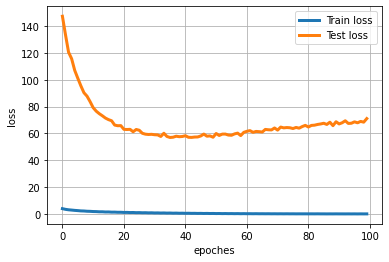

In [9]:
plt.plot(range(len(train_loss_his)),train_loss_his,'-',linewidth=3,label='Train loss')
plt.plot(range(len(train_loss_his)),test_loss_his,'-',linewidth=3,label='Test loss')
plt.xlabel('epoches')
plt.ylabel('loss')
plt.grid(True)
plt.legend()

In [10]:
print('accuracy: ' + str(evaluate(net,testDataLoader)*100) + '%')

accuracy: 63.56%
